In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
import PIL
import tensorflow as tf
from preprocess import rescale_segment as rescale_segment
from preprocess import extract_segments as extract_segments

## Image segmentation + Resampling

In [2]:
def rescale_segment( segment, size = [28,28], pad = 0 ):
    '''function for resizing (scaling down) images
    input parameters
    seg : the segment of image (np.array)
    size : out size (list of two integers)
    output 
    scaled down image'''
    if len(segment.shape) == 3 : # Non Binary Image
        import cv2
        # thresholding the image
        ret,segment = cv2.threshold(segment,127,255,cv2.THRESH_BINARY)
    m,n = segment.shape
    idx1 = list(range(0,m, (m)//(size[0]) ) )
    idx2 = list(range(0,n, n//(size[1]) )) 
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = segment[ idx1[i] + (m%size[0])//2, idx2[j] + (n%size[0])//2]
    return out

def extract_segments(img, pad=30, reshape = 0,size = [28,28], area = 150, threshold = 100, 
                     gray = False, dil = True, ker = 1) :
    '''function to extract individual chacters and digits from an image
    input paramterts
    img : input image (numpy array)
    pad : padding window size around segments (int)
    size : out size (list of two integers)
    reshape : if 1 , output will be scaled down. if 0, no scaling down
    area : Minimum area requirement for connected component detection
    thresh : gray scale to binary threshold value
    gray : if False, the segments returned will be binary, else will be gray scale
    dil : if True, performs dilation on segments, else erosion
    ker : dimesnion of kernel size for dilation / erosion
    Returns
    out : list of each segments (starting from leftmost digit)'''
    
    import cv2
    
    # thresholding the image
    ret,thresh1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    
    # Negative tranform gray levels (background becomes black) 
    thresh1 = 255 - thresh1
    img = 255 - img

    # connected component labelling 
    output = cv2.connectedComponentsWithStats(thresh1, 4)
    final = []
    temp2 = output[2]
    temp2 = temp2[temp2[:,4]>area]
    temp1 = np.sort( temp2[:,0] )
    kernel = np.ones( [ker, ker])

    for i in range(1,temp2.shape[0]):
        cord = np.squeeze( temp2[temp2[:,0] == temp1[i]] )
#         import pdb; pdb.set_trace()
#         print(cord)
    
        if gray == False:
            num = np.pad( thresh1[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')
        else :
            num = np.pad( img[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')

        if dil :
            num = cv2.dilate(num,kernel,iterations = 1)
        else :
            num = cv2.erode(num,kernel,iterations = 1)

        if reshape == 1:
            num = rescale_segment( num, size )
        final.append(num/255)
        
    return final


# # reading the image,  0 would convert to gray image
# img = cv2.imread('/Users/josejoy/Desktop/ECE 271B Stat Learning /project/eq1.jpg',0)
# segments= extract_segments(img, 30, reshape = 1, size = [28,28] )
# plt.imshow(segments[0],cmap = 'gray')
# plt.show()


## Morphological operations

In [ ]:
kernel = np.ones( [2,2])
opening = cv2.morphologyEx(segments[0], cv2.MORPH_CLOSE, kernel )
# dilation = cv2.dilate(resam,kernel,iterations = 1)
plt.imshow(opening,cmap = 'gray')
plt.show()  

## Equation manipulation

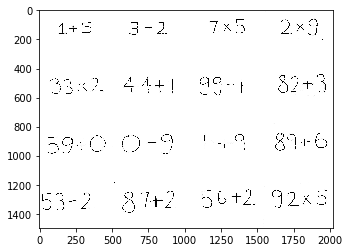

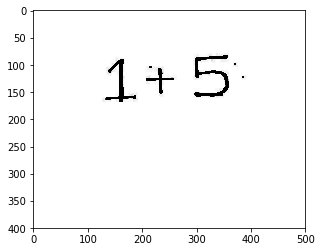

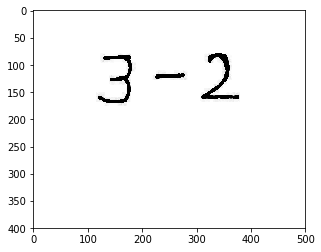

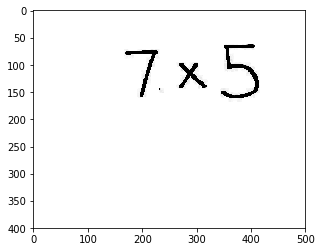

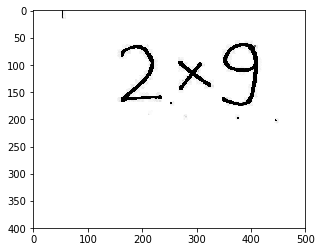

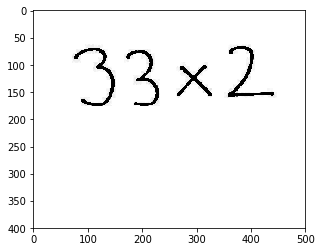

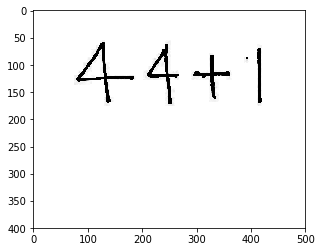

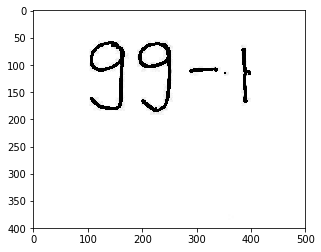

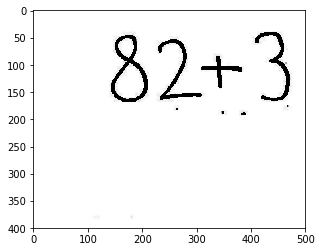

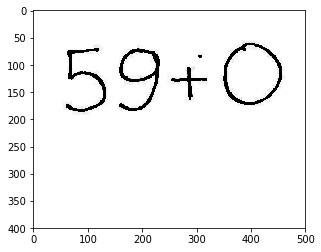

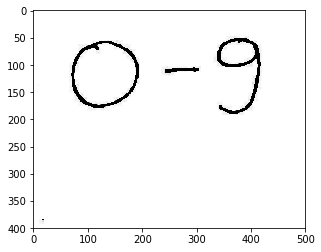

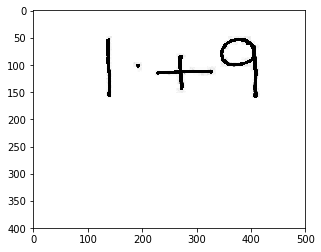

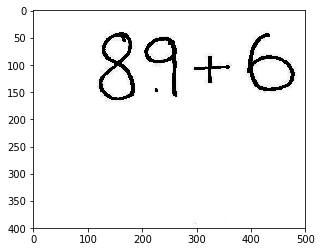

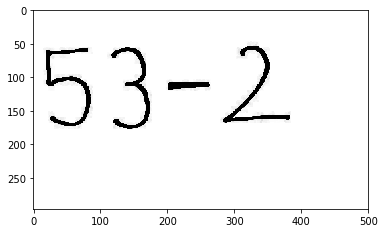

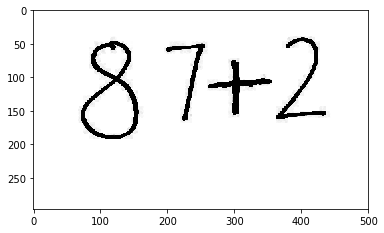

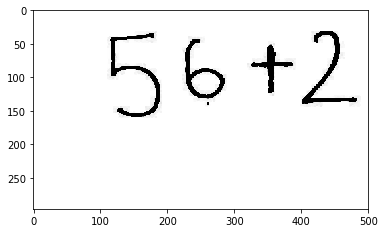

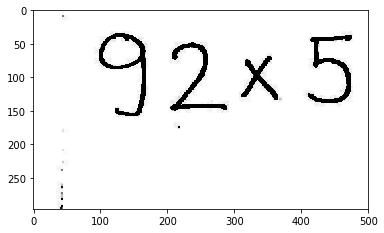

In [18]:
img = cv2.imread('/Users/josejoy/Desktop/ECE 271B Stat Learning /project/Data/Equation data/eqn2.jpg',0)
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# ret2,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img,cmap = 'gray')
plt.show() 
image = [] ## for eqn_im_1
for i in range(4):
    for j in range(4):
#         x1 = 600*i ; x2 = x1+600; y1 = 750*j ; y2 = y1 + 750; ## for eqn2 and eq3
        x1 = 400*i ; x2 = x1+400; y1 = 500*j ; y2 = y1 + 500
        temp = img[x1:x2,y1:y2];
        kernel = np.ones( [3,3])
        temp = cv2.erode(temp,kernel,iterations = 1)
        image.append(temp)
        plt.imshow(temp,cmap = 'gray')
        plt.show() 


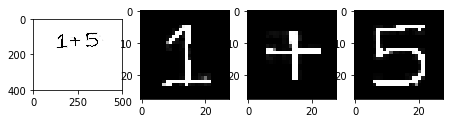

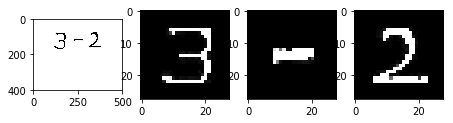

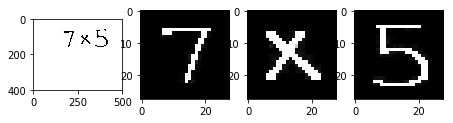

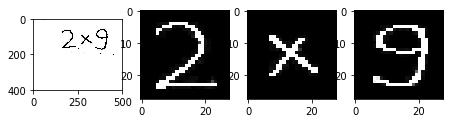

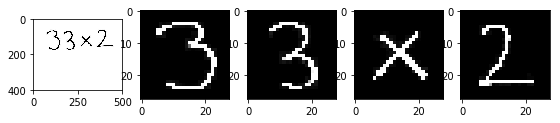

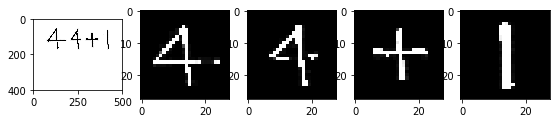

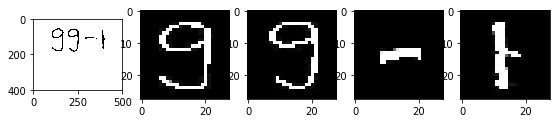

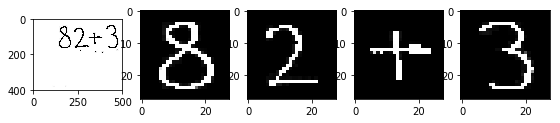

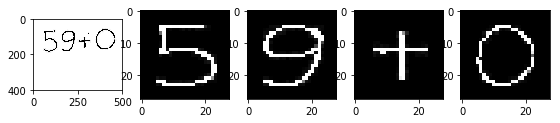

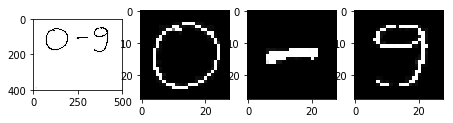

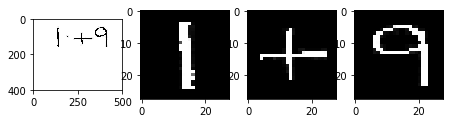

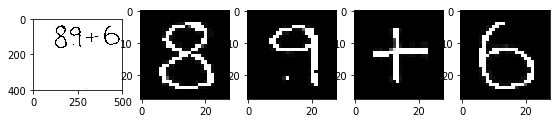

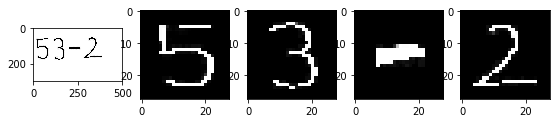

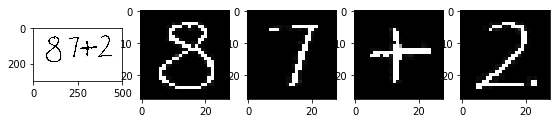

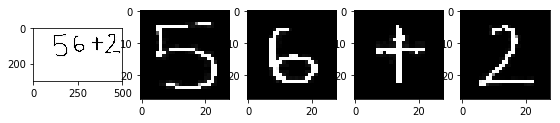

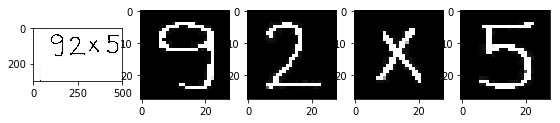

In [19]:
for i in range(len(image)):
    im1 = image[i]
    segments= extract_segments(im1, 30, reshape = 1, size = [28,28], 
                               threshold = 40, area = 200, ker = 1, gray = True)
    plt.figure(figsize=[15,15])
    plt.subplot(181)
    plt.imshow(im1,cmap = 'gray')
    for j in range(len(segments)):
        plt.subplot(182+j)
        plt.imshow(segments[j],cmap = 'gray')
    plt.show()


In [20]:
np.save('./Data/Equation data/Equations_images_2.npy',np.array(image))

In [9]:
image[15].shape

(700, 968)